# ALL YOU NEED TO KNOW ABOUT PANDAS

### by Tran Nguyen



This is a comprehensive tutorial for using all the important features/functions in pandas, one of the most common Python packages for data science.

Press `Ctrl + F` and input a keyword to find what function that you want to learn.

**How to write notation**

$$H_0: \mu = 67.60$$

$$H_1: \mu \neq 67.60$$

$$H_0: p_{new}<= p_{old}$$

$$H_1: p_{new} > p_{old}$$

## 1. IMPORT NECCESARY PACKAGES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

## 2. CREATE SERIES AND DATAFRAME

### 2.1. CREATE SIMPLE SERIES AND DATAFRAME

In [57]:
## Create random numpy array
array = np.random.rand(3)
array

array([0.23429011, 0.75622978, 0.15600182])

In [58]:
## Create a numpy array with repeat value
num = 20
color_red = np.repeat('red', num)
color_red

array(['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red'], dtype='<U3')

In [59]:
## Create panda series from list
num_list = [1, 4, 5, 9, 4]
series = pd.Series(num_list)

## Create panda series
series = pd.Series(np.random.rand(3))

series = pd.Series(np.random.rand(3), index =['First',
                                             'Second', 'Third'])
series

## Getting element from series
series[0]
series['First']
series.index

Index(['First', 'Second', 'Third'], dtype='object')

In [ ]:
### Creat time series
s = pd.date_range('2016-12-31', '2017-01-08', freq='D').to_series()
s

In [60]:
## Create panda dataframe
df = pd.DataFrame(np.random.rand(3,2))

## Name columns
df.columns = ['1st', '2nd']

 ## Rename columns
df.rename(columns = {'1st':'First', '2nd':'Second'}, inplace = True)
df

## Create dataframe with similar rows:
# df = pd.DataFrame([[2,3]] * 3, columns = ['A', 'B'])

,First,Second
0,0.052155,0.995700
1,0.824380,0.870366
2,0.433655,0.188447


In [61]:
## Append 2 dataframe
df2 = pd.DataFrame(np.random.rand(3,2), columns = ['First', 'Second'])
df3 = df.append(df2)
df3

,First,Second
0,0.052155,0.995700
1,0.824380,0.870366
2,0.433655,0.188447
0,0.335458,0.841771
1,0.631636,0.686837
2,0.996321,0.103856


### 2.2. CREATE A COPY OF A DATAFRAME

In [62]:
df4 = df.copy()

#checking if they are identical
(df4 == df).all()
# confirm column labels for 2 dataframes are identical
df.columns == df4.columns
(df.columns == df4.columns).all()

True

### 2.3. CREATE DATAFRAME USING THE APPLY FUNCTION

In [63]:
## Create dataframe with similar rows:
df = pd.DataFrame([[2,3]] * 3, columns = ['A', 'B'])
df

,A,B
0,2,3
1,2,3
2,2,3


In [64]:
## Using apply function
# Simple function
df.apply(np.sqrt)

,A,B
0,1.414214,1.732051
1,1.414214,1.732051
2,1.414214,1.732051


In [65]:
## sum all columns
print(df.apply(np.sum, axis = 0))
## sum all rows
print(df.apply(np.sum, axis = 1))

A    6
B    9
dtype: int64
0    5
1    5
2    5
dtype: int64


## 3. READ FILE

Very good reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-chunking

In [66]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

### 3.1. READ_CSV FILE
#### 3.1.1. SIMPLE "READ_CSV"

In [67]:
## Simple read
#df_titanic = pd.read_csv('/kaggle/input/titanic/train.csv')
df_titanic = pd.read_csv('train.csv')

#### 3.1.2. OTHER OPTION IN READ_CSV

In [68]:
%%script echo skip running this cell

#### Other options for reading

## read different format (seperator is not comma)
df_titanic = pd.read_csv('/kaggle/input/titanic/train.csv', sep = ':')

## specify which line of the file is the header: header = number or header = None
df_titanic = pd.read_csv('/kaggle/input/titanic/train.csv', header = 2)

## A trial - only read some lines to inspect the data
df_titanic = pd.read_csv('/kaggle/input/titanic/train.csv', nrows = 3)
df_titanic.shape

## Read and set a column as index col, example here is 'PassengerId'
df_titanic = pd.read_csv('/kaggle/input/titanic/train.csv', 
                         nrows = 3, index_col = 'PassengerId')
## Specify more of your columns to be the index of your dataframe.
df_titanic = pd.read_csv('/kaggle/input/titanic/train.csv', 
                        index_col = ['PassengerId', 'Age'])
## Read only some columns
target_columns = ['PassengerId','Survived', 'Pclass', 'Sex', 'Age']
df_titanic = pd.read_csv('/kaggle/input/titanic/train.csv', 
                         index_col = 'PassengerId',
                        usecols = target_columns)

#specify your own column labels, unless you provide all/enough the columns name,
# otherwise, these labels will replace the last columns in the dataframe
labels = ['my column 1', 'my column 2', 'my column 3', 'my column 4', 'my column 5']
df_titanic = pd.read_csv('/kaggle/input/titanic/train.csv', 
                         names = labels)
#=> all rows, including header (if have) will be in the row and below the header 'labels'

## If you want to tell pandas that there was a header line that you are replacing, 
#you can specify the row of that line like this.
df_titanic = pd.read_csv('/kaggle/input/titanic/train.csv', header = 0, names = labels)

df_titanic

skipping # skip running this cell


### 3.1.3. READ BIG DATASET USING THRESHOLD

In [69]:
# Reading samples that have Age > 30 using .query
#df_titanic_over_30 = pd.read_csv('/kaggle/input/titanic/train.csv').query('Age > 30')
df_titanic_over_30 = pd.read_csv('train.csv').query('Age > 30')
df_titanic_over_30

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


### 3.1.4. READ BIG FILE BY ITERATING THROUGH CHUNK BY CHUNK

In [ ]:
%%script echo skipping # skip running this cell

# To iterate through a large file lazily rather than reading the entire file into memory
### APPROACH 1
reader = pd.read_csv(filepath, sep = '|', chunksize = 4)
# reader type: an object <pandas.io.parsers.TextFileReader at 0x7f5336de7550>
for chunk in reader:
    print(chunk)
    
### APPROACH 2
reader = pd.read_csv(filepath, sep='|', iterator = True)
reader.get_chunk(5) #=> print out the first 5 lines.

## 3.2. READ JSON FILE

In [ ]:
%%script echo skipping # skip running this cell

df = pd.read_json(filepath, lines = True)

## 3.3. READ REMOTE FILES (URL OR CLOUD)

In [ ]:
%%script echo skipping # skip running this cell
### read from a url path
df = pd.read_csv(urls, sep='\t')

### read from s3 bucket
df = pd.read_csv('s3://pandas-test/tips.csv')
# If the S3 bucket requires credentials => check https://s3fs.readthedocs.io/en/latest/#credentials

## 4. SAVE DATAFRAME 

In [70]:
%%script echo skipping # skip running this cell

## Save for later use on pickle
df_titanic.to_pickle('df_titanic.pickle')

## Save to a csv file, will store unwanted index as a column 'Unnamed:0?''
df_titanic.to_csv('df_titanic_edited.csv')

## To make it ignore the index
df_titanic.to_csv('df_titanic_edited.csv', index = False)

skipping # skip running this cell


## 5. EXPLORE DATAFRAME

There are many different ways to explore dataframe

### 5.1. High-level overview of data shape and composition

In [71]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [72]:
# dimensions of the dataframe
df_titanic.shape

# the datatypes of the columns
df_titanic.dtypes

## Note: strings will appear as objects in Pandas
# further investigation of the data type "objects" shows it's a string
type(df_titanic['Name'][0])

str

In [73]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
# this returns useful descriptive statistics for each column of data
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
# this returns the number of unique values in each column
df_titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### 5.2. Count values

#### 5.2.1. Count the number of non-NaN values in each column/row

In [181]:
## Generate a dataframe
data = pd.DataFrame([['Class D', np.nan, 8],['Class A', 13, np.nan], ['Class F', np.nan, np.nan]], 
                    columns = ['Name', 'Val1', 'Val2'])
data

,Name,Val1,Val2
0,Class D,NaN,8.0
1,Class A,13.0,NaN
2,Class F,NaN,NaN


In [183]:
# Count non-NaN in each column
data.count()

Name    3
Val1    1
Val2    1
dtype: int64

In [184]:
# Count non-NaN in each row
data.count(axis = 1)

0    2
1    2
2    1
dtype: int64

In [185]:
# Count non-NaN in each row for specific columns
data[['Val1', 'Val2']].count(axis = 1)

0    1
1    1
2    0
dtype: int64

## 6. EXPLORE DATA SERIES (A DATAFRAME COLUMN)

In [76]:
# this returns the number of unique values in each column
df_titanic.SibSp.value_counts()
#df_titanic.SibSp.value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [77]:
# Get the index and value in value_counts() using:
df_titanic.SibSp.value_counts().index
df_titanic.SibSp.value_counts().values

array([608, 209,  28,  18,  16,   7,   5])

In [78]:
%%script echo skipping # skip running this cell
df_titanic.SibSp.values # Get all the values in a column

skipping # skip running this cell


In [79]:
%%script echo skipping # skip running this cell
# Using condition to check if something exist in a column
num = 10
assert num in df_titanic.SibSp.values, "There is no {} in SibSp column!".format(num)

skipping # skip running this cell


## 7. CLEANING DATA

### 7.1. MISSING VALUE

In [80]:
## Which features have missing values?
df_titanic.isnull().sum()
## checks if any of columns in dataframe have null values - should print False if there is no null values
df_titanic.isnull().sum().any()

True

In [81]:
# Use means to fill in missing values in 'Age'
mean = df_titanic['Age'].mean()
df_titanic['Age'] = df_titanic['Age'].fillna(mean)
# or df_titanic['Age'].fillna(mean, inplace = True)

In [82]:
### DROP ROWS WITH MISSING VALUES
# view missing value count for each feature in dataframe
df_titanic.isnull().sum()
# drop rows with any null values in any column
df_titanic.dropna(inplace = True)
# drop rows with null values in all columns
df_titanic.dropna(how='all',inplace = True)

# checks if any of columns in the dataframe have null values - should print False
df_titanic.isnull().sum().any()

False

### 7.2. DUPLICATES

In [83]:
## Check for duplicates in the data
sum(df_titanic.duplicated())
## Drop duplicates
df_titanic.drop_duplicates(inplace = True)
## Confirm correction by rechecking for duplicates in the data
sum(df_titanic.duplicated())
# or
df_titanic.duplicated().sum()

0

### 7.3. CHANGE DATA TYPES

#### 7.3.1. CHANGE TIME

In [84]:
%%script echo skipping # skip running this cell

## convert time to datetime #just a demo, not in titanic data
df['Time'] = pd.to_datetime(df['Time'])

skipping # skip running this cell


#### 7.3.2. CHANGING DATATYPES OF COLUMNS

In [85]:
### CHANGING DATATYPES OF COLUMNS

# Example of dataframe with numbers in strings
df_string = pd.DataFrame([['5', '4',2.5],['1.4', '5', 2]], columns = ['First','Second','Third'])
df_string

,First,Second,Third
0,5,4,2.5
1,1.4,5,2.0


In [86]:
# Checking datatypes
df_string.info()
# or
df_string.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   First   2 non-null      object 
 1   Second  2 non-null      object 
 2   Third   2 non-null      float64
dtypes: float64(1), object(2)
memory usage: 176.0+ bytes


First      object
Second     object
Third     float64
dtype: object

In [87]:
df_string['First'] = df_string['First'].astype(float)
df_string['First'] = df_string['Second'].astype(int)

#### 7.3.3. SET UP ORDER FOR A CATEGORICAL VARIABLE (GOOD FOR CHART)

In [88]:
## Generate a dataframe
data = pd.DataFrame([['Class D', 15, 8],['Class A', 13, 6], ['Class F', 9, 5]], 
                    columns = ['Name', 'Val1', 'Val2'])
data

,Name,Val1,Val2
0,Class D,15,8
1,Class A,13,6
2,Class F,9,5


In [89]:
## SET UP THE ORDER FOR THE 'NAME' VARIABLE
name_order = ['Class A', 'Class D', 'Class F']
new_class = pd.api.types.CategoricalDtype(ordered = True, 
                                          categories = name_order)
data['Name'] = data['Name'].astype(new_class)
data
# => When plot, the column name will be classified as order.

,Name,Val1,Val2
0,Class D,15,8
1,Class A,13,6
2,Class F,9,5


## 8. MANIPULATING DATAFRAME

### 8.1. INDEXING AND SELECTING DATA IN PANDAS - USING LOC AND ILOC

- loc uses labels of rows or columns to select data

- iloc uses the index numbers

In [90]:
# View the index number and label for each column
for i, v in enumerate(df_titanic.columns):
    print(i, v)

0 PassengerId
1 Survived
2 Pclass
3 Name
4 Sex
5 Age
6 SibSp
7 Parch
8 Ticket
9 Fare
10 Cabin
11 Embarked


In [91]:
## Extracting some specific columns only, no need range (no need loc and iloc)
df_extracted = df_titanic[['Survived', 'Age']]

## select all the columns from 'PassengerId' to 'Age':
df_personal_info = df_titanic.loc[:,'PassengerId':'Age']
df_personal_info.head()

,PassengerId,Survived,Pclass,Name,Sex,Age
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0


In [92]:
# repeat the step above using index numbers, remember 1:6 will include from index 1 to 5, not 6.
df_personal_info = df_titanic.iloc[:,1:6]
df_personal_info.head()

,Survived,Pclass,Name,Sex,Age
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0


In [93]:
## select some columns separated in different ranges
#Using np.r_[]
df_other_info = df_titanic.iloc[:,np.r_[:2, 6:12]]
df_other_info

,PassengerId,Survived,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,0,PC 17599,71.2833,C85,C
3,4,1,1,0,113803,53.1000,C123,S
6,7,0,0,0,17463,51.8625,E46,S
10,11,1,1,1,PP 9549,16.7000,G6,S
11,12,1,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...
871,872,1,1,1,11751,52.5542,D35,S
872,873,0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,0,1,11767,83.1583,C50,C
887,888,1,0,0,112053,30.0000,B42,S


In [94]:
## loc: Extract based on value on an column
df_titanic_extracted_1 = df_titanic.loc[df_titanic['Age'] == 28, :]

## iloc
df_titanic_extracted_2 = df_titanic.iloc[15:50, [2,3,5]]

In [95]:
## Using loc to change value based on condition
df_titanic.query('Age <1')['Age'].value_counts() # => result is  0.92   1
# For example, changing Age of 0.92 to 1
df_titanic.loc[(df_titanic['Age'] == 0.92), 'Age'] = 1
# Check the result again to see there is no more Age = 0.92
df_titanic.query('Age <2')['Age'].value_counts()

1.0    2
Name: Age, dtype: int64

In [ ]:
## CALCULATE THE AVERAGE VALUE
def calculate_average(df, n, column, pos):
    sum = 0
    for j in range(pos, pos + n):
        #print(df.iloc[j, column])
        sum += df.iloc[j, column]
        
    return np.round(sum/n,2)

### MOVING AVERAGE (MA)
def move_average(df, n, column):
    #print("n:",n, column)
    for i in range(0,df.shape[0] - (n - 1)):
        val = calculate_average(df, n, column, i)
        df.loc[df.index[i + (n - 1)],'MA_{}'.format(n)] = val
    return df

paces = [3, 5, 10]
for pace in paces:
    df = move_average(df, pace, 1)
df

### 8.2. USING PANDA QUERY

In [96]:
df_titanic['Embarked'] = df_titanic['Embarked'].astype(str)

In [97]:
df_titanic.query('Embarked in ["C", "S"]').nunique()

PassengerId    198
Survived         2
Pclass           3
Name           198
Sex              2
Age             63
SibSp            4
Parch            4
Ticket         138
Fare            97
Cabin          144
Embarked         2
dtype: int64

In [98]:
# 2 columns condition
df_titanic.query('Embarked =="C" and Cabin == "C85"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [99]:
df_extract = df_titanic.query('Age in [35, 38]')
df_extract.shape

(10, 12)

In [100]:
# Using condition in Boolean indexing
df_titanic_age_over28 = df_titanic[df_titanic['Age'] > 28]
# or using query
df_titanic_age_over28 = df_titanic.query('Age > 28') # with string, using ('Age =="28"')
df_titanic_age_over28

# Using query with variables: Using str.format()
threshold = 28
col_name = 'Age'
df_titanic_age_over28 = df_titanic.query('{0} > {1}'.format(col_name, threshold))
# or 
df_titanic_age_over28 = df_titanic.query('Age > {1}'.format(col_name, threshold))

# or Using f.strings
df_titanic_age_over28 = df_titanic.query(f"{col_name} > {threshold}")
# or
df_titanic_age_over28 = df_titanic.query(f"Age > {threshold}")
df_titanic_age_over28
# Using query with variables: Using f.strings for str type:
embark_type = 'Embarked'
value_embark = 'C'
df_titanic_embark_c = df_titanic.query(f"{embark_type} == '{value_embark}'")

### 8.3. MANIPULATE STRING IN DATAFRAME

#### 8.3.1. CHANGE STRING IN NAME OF INDEX

In [101]:
## Change index name using string:
df_simple = pd.DataFrame([1, 5, 9], )
df_simple.index = ['low', 'moderately_high', 'high']
df_simple

,0
low,1
moderately_high,5
high,9


In [102]:
# Change the name of index by string function
df_simple.index = df_simple.index.str.replace('_', ' ')

# Get index name - Upper Case the index name
labels = df_simple.index.str.title()
labels

Index(['Low', 'Moderately High', 'High'], dtype='object')

In [103]:
df_simple

,0
low,1
moderately high,5
high,9


#### 8.3.2.  NAME OF COLUMNS

In [104]:
# df_titanic.rename(columns = {'Survived':'Survived Case'}, inplace = True)
# df_titanic.head(2)

In [105]:
## # replace spaces with underscores and lowercase labels for 2008 dataset
# df_titanic.rename(columns = lambda x: x.strip().lower().replace(" ", "_"), inplace = True)

# # confirm changes
# df_titanic.head(1)

#### 8.3.3. EXTRACT NUMBER FROM STRING

In [106]:
# Example of dataframe with numbers in strings
df_string = pd.DataFrame(['(6 cylc)', 'S03', 'U71', 'VV04L'])
df_string

,0
0,(6 cylc)
1,S03
2,U71
3,VV04L


In [107]:
# Extract number
df_string[0] = df_string[0].str.extract('(\d+)').astype(int)
# Checking by simply call df_string[0] or count the unique value using value_counts()
df_string[0].value_counts()

71    1
6     1
4     1
3     1
Name: 0, dtype: int64

#### 8.3.4.  EXTRACT THE ROWS THAT HAVE VALUE CONTAIN A SPECIFIC LETTER IN A COLUMN

In [108]:
# Example of dataframe with numbers in strings
df_string = pd.DataFrame(['(6 cylc)', '6/4', '7*5', '4-2'])
df_string

,0
0,(6 cylc)
1,6/4
2,7*5
3,4-2


In [110]:
# Get all the rows that contain specific charater
df_extracted = df_string[df_string[0].str.contains('/')]
print(df_extracted)
df_extracted = df_string[df_string[0].str.contains('\*')]
print(df_extracted)
df_extracted = df_string[df_string[0].str.contains('\(')]
print(df_extracted)
df_extracted = df_string[df_string[0].str.contains('-')]
print(df_extracted)

     0
1  6/4
     0
2  7*5
          0
0  (6 cylc)
     0
3  4-2


#### 8.3.5. SPLIT COLUMNS BASED ON STRING

In [111]:
## Example of dataframe with numbers in strings
df_string = pd.DataFrame([['15/23', '4','6/4'],['4', '5', '12'],
                          ['11/16', '5','12/6']], columns = ['First','Second','Third'])
df_string

,First,Second,Third
0,15/23,4,6/4
1,4,5,12
2,11/16,5,12/6


In [112]:
# Extracted the hybrid rows
hb_string = df_string[df_string['First'].str.contains('/')]
hb_string

,First,Second,Third
0,15/23,4,6/4
2,11/16,5,12/6


In [113]:
### Separate the hybrid into different rows to different dataframe
## Create the copies of hybrid df
df_string1 = hb_string.copy()
df_string2 = hb_string.copy()
## Split
split_columns = ['First', 'Third']
# apply split function to each column of each dataframe copy
for c in split_columns:
    df_string1[c] = hb_string[c].apply(lambda x: x.split("/")[0])
    df_string2[c] = hb_string[c].apply(lambda x: x.split("/")[1])
#check the result dataframes
df_string1

,First,Second,Third
0,15,4,6
2,11,5,12


In [114]:
df_string2

,First,Second,Third
0,23,4,4
2,16,5,6


In [115]:
## Combine the result back to the original dataframe
new_rows = df_string1.append(df_string2)

## drop the original hybrid rows in the original string
df_string.drop(hb_string.index, inplace = True)

# add in our newly separated rows
df_string = df_string.append(new_rows, ignore_index=True)
# check that all the original hybrid rows with "/"s are gone
df_string[df_string['First'].str.contains('/')]

,First,Second,Third


#### 8.3.6. MODIFIED THE NAME OF ALL COLUMNS AT THE SAME TIME - USING LAMBDA FUNCTION

In [116]:
df_string2.rename(columns = lambda x: x[:10] + "_2008", inplace = True)
df_string2

,First_2008,Second_2008,Third_2008
0,23,4,4
2,16,5,6


#### 8.3.7. FIND A STRING/SUBSTRING IN COLUMN

In [142]:
 #If the substring doesn’t exist in the text, -1 is returned. 
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Binary_SibSp
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0


#### 8.3.7. CAPITALIZE THE FIRST LETTER OF STRING IN COLUMN

In [176]:
# creating a dataframe 
df = pd.DataFrame({'A': ['john', 'bODAY', 'minA', 'Peter', 'nicky'], 
                  'B': ['masters', 'graduate', 'graduate', 
                                   'Masters', 'Graduate'], 
                  'C': [27, 23, 21, 23, 24]}) 
df

,A,B,C
0,john,masters,27
1,bODAY,graduate,23
2,minA,graduate,21
3,Peter,Masters,23
4,nicky,Graduate,24


In [174]:
# First method  
df['A'] = df['A'].str.capitalize()  
df 

,A,B,C
0,John,masters,27
1,Boday,graduate,23
2,Mina,graduate,21
3,Peter,Masters,23
4,Nicky,Graduate,24


In [178]:
# Second method
df['A'] = df['A'].apply(lambda x: x.capitalize())
df

,A,B,C
0,John,masters,27
1,Boday,graduate,23
2,Mina,graduate,21
3,Peter,Masters,23
4,Nicky,Graduate,24


### 8.4. DROP EXTRANEOUS COLUMNS

In [117]:
# target_drop = ['PassengerId', 'Name', 'Ticket']
# df_titanic.drop(target_drop, axis = 1, inplace = True)
# df_titanic.head(2)

### 8.5. ADD A COLUMN BASED ON A CONDITION

#### 8.5.1. ADD NEW COLUMN BASED ON VALUE IN 1 COLUMN

In [118]:
df_titanic['Binary_SibSp'] = [1 if x>1 else 0 for x in df_titanic.SibSp]
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Binary_SibSp
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,35.112788,0.445545,0.440594,76.103301,0.044554
std,249.704228,0.473732,0.528205,14.987568,0.630490,0.732294,74.759941,0.206836
min,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,25.000000,0.000000,0.000000,28.959375,0.000000
50%,457.500000,1.000000,1.000000,33.500000,0.000000,0.000000,55.000000,0.000000
75%,681.500000,1.000000,1.000000,46.750000,1.000000,1.000000,89.776050,0.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,1.000000


#### 8.5.2. ADD NEW COLUMN BY COMPARE OTHER COLUMNS

In [171]:
## Example of dataframe with numbers in strings
df_p = pd.DataFrame([['Dog1', 0.4, True, 'Dog2', 0.2, True],
                          ['Dog1', 0.8, True, 'spoon', 0.2, False],
                          ['spoon1', 0.8, False, 'spoon', 0.2, False],
                          ['Bike', 0.8, False, 'Dog2', 0.2, True],
                         ], 
                         columns = ['p1','p1_conf','p1_bool','p2','p2_conf','p2_bool'])
df_p

,p1,p1_conf,p1_bool,p2,p2_conf,p2_bool
0,Dog1,0.4,True,Dog2,0.2,True
1,Dog1,0.8,True,spoon,0.2,False
2,spoon1,0.8,False,spoon,0.2,False
3,Bike,0.8,False,Dog2,0.2,True


In [172]:
conditions = [
    (df_p['p1_bool'] == True),
    (df_p['p1_bool'] == False) & (df_p['p2_bool'] == True)]

choices = [df_p['p1'], df_p['p2']]

df_p['prediction'] = np.select(conditions, choices, default= "No_Dog")
df_p

,p1,p1_conf,p1_bool,p2,p2_conf,p2_bool,prediction
0,Dog1,0.4,True,Dog2,0.2,True,Dog1
1,Dog1,0.8,True,spoon,0.2,False,Dog1
2,spoon1,0.8,False,spoon,0.2,False,No_Dog
3,Bike,0.8,False,Dog2,0.2,True,Dog2


In [179]:
a = [['10', '1.2', '4.2'], ['15', '70', '0.03'], ['8', '5', '0']]
df = pd.DataFrame(a, columns=['one', 'two', 'three'])
### For 1 condition
# df['que'] = np.where((df['one'] >= df['two']) & (df['one'] <= df['three'])
#                    , df['one'], np.nan)
    
### For many conditions
conditions = [
    (df['one'] >= df['two']) & (df['one'] <= df['three']), 
    df['one'] < df['two']]

choices = [df['one'], df['two']]

df['que'] = np.select(conditions, choices, default = np.nan)
df

,one,two,three,que
0,10,1.2,4.2,10
1,15,70,0.03,70
2,8,5,0,NaN


### 8.6. GROUPBY

Full detail reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [119]:
df_titanic['Pclass'].nunique()

3

In [120]:
# groupby 1 column
df_titanic.groupby('Sex').mean()

#groupby 2 columns
df_titanic.groupby(['Sex', 'Pclass']).mean()

# Groupby but don't set the groupby column(s) as index
df_titanic.groupby(['Sex', 'Pclass'], as_index = False).mean()

# Groupby, display some column only => dataframe
df_titanic.groupby(['Sex', 'Pclass'], as_index = False)['Fare'].mean()
# OR => panda series
# df_titanic.groupby(['Sex', 'Pclass'], as_index = False).mean().Fare

,Sex,Pclass,Fare
0,female,1,101.594620
1,female,2,14.614170
2,female,3,14.859717
3,male,1,72.815703
4,male,2,23.812500
5,male,3,8.537500


### 8.7. CUT DATA INTO DIFFERENT GROUPS BASED ON VALUE OF A COLUMN**

In [5]:
## Example of assessing the level of acidity (pH)
#df_wine = pd.read_csv('../input/winequalityred/winequality-red.csv')
df_wine = pd.read_csv('winequality-red.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
bin = df_wine.describe().pH
bin

count    1596.000000
mean        3.311917
std         0.153346
min         2.860000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

In [8]:
# Bin edges that will be used to "cut" the data into 4 groups (5 values of bin edges)
bin_edges = bin[3:].tolist()
bin_edges

[2.86, 3.21, 3.31, 3.4, 4.01]

In [7]:
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low'] # Name each acidity level category
# Creates acidity_levels column
df_wine['acidity_levels'] = pd.cut(df_wine['pH'], bin_edges, labels=bin_names)
# Checks for successful creation of this column
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,mod_high
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


### 8.8. MERGE 2 DATAFRAMES

#### 8.8.1. MERGE 2 DATAFRAMES - SIMILAR COLUMNS, MAY HAVE DUPLICATE

In [124]:
## Example dataframe
df1 = pd.DataFrame([['bear', 12, 232.5],['squirrel', 4, 0.5],['pig', 6, 132.4]], 
                    columns = ['animal', 'year', 'weight'])
df1

,animal,year,weight
0,bear,12,232.5
1,squirrel,4,0.5
2,pig,6,132.4


In [125]:
## Example dataframe
df2 = pd.DataFrame([['horse', 10, 212.5],['squirrel', 4, 0.5],['deer', 8, 127.4]], 
                    columns = ['animal', 'year', 'weight'])
df2

,animal,year,weight
0,horse,10,212.5
1,squirrel,4,0.5
2,deer,8,127.4


In [141]:
df_merge = pd.concat([df1, df2]).drop_duplicates().reset_index(drop=True)
# drop = True to remove the index column
df_merge

,animal,year,weight
0,bear,12,232.5
1,squirrel,4,0.5
2,pig,6,132.4
3,horse,10,212.5
4,deer,8,127.4


#### 8.8.2. MERGE 2 DATAFRAMES - INNER MERGE

In [127]:
# Create df
df_merge1 = pd.DataFrame([[2.0, 'AUDI', 4], [5.0, 'ACURA', 8]], columns = ['Value1', 'Name', 'Value2'])
df_merge2 = pd.DataFrame([[6.0, 'HONDA', 2], [4.0, 'ACURA', 6]], columns = ['Value1_2', 'Name_2', 'Value2_2'])
df_merge2

,Value1_2,Name_2,Value2_2
0,6.0,HONDA,2
1,4.0,ACURA,6


In [128]:
## Inner merge
df_merged = df_merge1.merge(df_merge2, left_on = 'Name', right_on = 'Name_2', how = 'inner')
df_merged

,Value1,Name,Value2,Value1_2,Name_2,Value2_2
0,5.0,ACURA,8,4.0,ACURA,6


### 8.9. ROLLING

#### 8.9.1. SIMPLE ROLLING

Using built-in function 

In [2]:
# Create example dataframe
df = pd.DataFrame([[12,7], [9, 6], [15, 5], [11, 6]], columns = ['First', 'Second'])
df

,First,Second
0,12,7
1,9,6
2,15,5
3,11,6


In [3]:
# rolling sum
df.rolling(2).sum()

,First,Second
0,NaN,NaN
1,21.0,13.0
2,24.0,11.0
3,26.0,11.0


In [6]:
# rolling sum
# min_periods int, default None: Minimum number of observations in window 
# required to have a value (otherwise result is NA)
df.rolling(2, min_periods = 1).sum()

,First,Second
0,12.0,7.0
1,21.0,13.0
2,24.0,11.0
3,26.0,11.0


In [4]:
# rolling mean
df.rolling(2).mean()
# similar result
df.rolling(2, win_type='triang').sum()

,First,Second
0,NaN,NaN
1,10.5,6.5
2,12.0,5.5
3,13.0,5.5


#### 8.9.2. ROLLING WITH DIFFERENT PACES

In [7]:
## FUNCTION TO CALCULATE THE MOVING AVERAGE (MA)
# df: dataframe, pace: the pace/window size of moving average
# target: column name that is the target for calculating MA
def move_average(df, pace, target):
    df_temp = df[[target]].rolling(pace).mean().rename(columns={target: (target + '_MA_{}'.format(pace))})
    return pd.concat([df_rolling, df_temp], axis = 1)

# Create example dataframe
df = pd.DataFrame([[6,12,7], [8,9, 6], [7,15, 5], [2,11, 6]], columns = ['Time','First', 'Second'])

df_rolling = df[['Time', 'First']]
paces = [2, 3, 4]
for pace in paces:
    df_rolling = move_average(df_rolling, pace, 'First')
df_rolling


,Time,First,First_MA_2,First_MA_3,First_MA_4
0,6,12,NaN,NaN,NaN
1,8,9,10.5,NaN,NaN
2,7,15,12.0,12.000000,NaN
3,2,11,13.0,11.666667,11.75


### 8.10. CUT

### 8.11. CREATE DUMMY VARIABLES - ENCODING

In [144]:
df_merge[['bear', 'deer', 'horse', 'pig', 'squirrel']] = pd.get_dummies(df_merge['animal'])
df_merge

,animal,year,weight,bear,deer,horse,pig,squirrel
0,bear,12,232.5,1,0,0,0,0
1,squirrel,4,0.5,0,0,0,0,1
2,pig,6,132.4,0,0,0,1,0
3,horse,10,212.5,0,0,1,0,0
4,deer,8,127.4,0,1,0,0,0


### 8.12. WORKING WITH NULL VALUE

#### 8.12.1. REPLACE A VALUE WITH NULL

In [186]:
df_merge.loc[df_merge.bear == 0,['bear']] = np.nan
df_merge

,animal,year,weight,bear,deer,horse,pig,squirrel
0,bear,12,232.5,1.0,0,0,0,0
1,squirrel,4,0.5,NaN,0,0,0,1
2,pig,6,132.4,NaN,0,0,1,0
3,horse,10,212.5,NaN,0,1,0,0
4,deer,8,127.4,NaN,1,0,0,0


### 8.13. WORKING WITH ILOC

#### 8.13.1. REPLACE A VALUE IN A SPECIFIC ROW INDEX

In [187]:
indices = [1,2]
df_merge.loc[indices,'bear'] = 0

df_merge

,animal,year,weight,bear,deer,horse,pig,squirrel
0,bear,12,232.5,1.0,0,0,0,0
1,squirrel,4,0.5,0.0,0,0,0,1
2,pig,6,132.4,0.0,0,0,1,0
3,horse,10,212.5,NaN,0,1,0,0
4,deer,8,127.4,NaN,1,0,0,0


### 8.14. USING 'WHERE'

In [ ]:
%%script echo Skip running this cell
#For dataframe df:
    Prices  Amount Action  Values
0       3      57   Sell     171
1      89      42   Sell    3738
2      45      70    Buy   -3150
3       6      43   Sell     258
4      60      47   Sell    2820
5      19      16    Buy    -304
# Cakculate value based on a condition
values = df.Prices * df.Amount
df['Values'] = values.where(df.Action == 'Sell', other=-values)

## 9. CHOOSING A RANDOM SUBSET OF DATAFRAME

In [ ]:
size = 20
df_test = df_titanic.sample(size)
df_test

## 10. RESHAPING DATA FRAME

### 10.1. TRANSPOSING DATA

In [6]:
data1 = pd.DataFrame({'a': [3,2], 'b':[5,4]}, index = ['odd', 'even'])
data1

,a,b
odd,3,5
even,2,4


In [7]:
### Transposing
data1.T

,odd,even
a,3,2
b,5,4


### 10.2. UNPIVOTING DATA WITH `MELT`

In [2]:
data1 = pd.DataFrame({'product': ['shirt', 'shoes', 'pants'], '2018': [20, 30, 40],
                     '2019': [50, 60, 70], '2020': [25, 35, 45]})
data1

,product,2018,2019,2020
0,shirt,20,50,25
1,shoes,30,60,35
2,pants,40,70,45


In [3]:
### Using melt function to unpivoting data (converting from horizontal to vertical/long format)
data2 = pd.melt(data1, id_vars = 'product', value_vars = ['2018', '2019', '2020'],
               var_name = 'year', value_name = 'price')
data2

,product,year,price
0,shirt,2018,20
1,shoes,2018,30
2,pants,2018,40
3,shirt,2019,50
4,shoes,2019,60
5,pants,2019,70
6,shirt,2020,25
7,shoes,2020,35
8,pants,2020,45


### 10.3. PIVOTING DATA WITH `PIVOT`

**Note:** A ValueError is raised if there are any duplicates in index or columns

In [9]:
data3 = data2.pivot(index = 'product', columns = 'year', values = 'price').reset_index()
data3

year,product,2018,2019,2020
0,pants,40,70,45
1,shirt,20,50,25
2,shoes,30,60,35


In [10]:
### Flatten a hierarchical index in columns
data3.columns = data3.columns.get_level_values(0)
data3

year,product,2018,2019,2020
0,pants,40,70,45
1,shirt,20,50,25
2,shoes,30,60,35


## 11. TIME SERIES IN PANDAS
Reference:

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [ ]:
# Creating a list of month from start and end date

date1 = '01/2001' # input start date
date2 = '12/2008' # input end date

month_list = [i.strftime("%b-%y") for i in pd.date_range(start=date1, end=date2, freq='6MS')]
month_list

## 12. MOVING AVERAGE

### 12.1. SIMPLE MOVING AVERAGE (MA)

In [129]:
### Example dataframe
product = {'month' : [1,2,3,4,5,6,7,8,9,10,11,12],'demand':[290,260,288,300,310,303,329,340,316,330,308,310]}
df = pd.DataFrame(product)
df

,month,demand
0,1,290
1,2,260
2,3,288
3,4,300
4,5,310
5,6,303
6,7,329
7,8,340
8,9,316
9,10,330


In [130]:
## CALCULATE THE AVERAGE VALUE
def calculate_average(df, n, column, pos):
    sum = 0
    for j in range(pos, pos + n):
        #print(df.iloc[j, column])
        sum += df.iloc[j, column]
        
    return np.round(sum/n,2)

### MOVING AVERAGE (MA)
def move_average(df, n, column):
    #print("n:",n, column)
    for i in range(0,df.shape[0] - (n - 1)):
        val = calculate_average(df, n, column, i)
        df.loc[df.index[i + (n - 1)],'MA_{}'.format(n)] = val
    return df

paces = [3, 5, 10]
for pace in paces:
    df = move_average(df, pace, 1)
df

,month,demand,MA_3,MA_5,MA_10
0,1,290,NaN,NaN,NaN
1,2,260,NaN,NaN,NaN
2,3,288,279.33,NaN,NaN
3,4,300,282.67,NaN,NaN
4,5,310,299.33,289.6,NaN
5,6,303,304.33,292.2,NaN
6,7,329,314.00,306.0,NaN
7,8,340,324.00,316.4,NaN
8,9,316,328.33,319.6,NaN
9,10,330,328.67,323.6,306.6


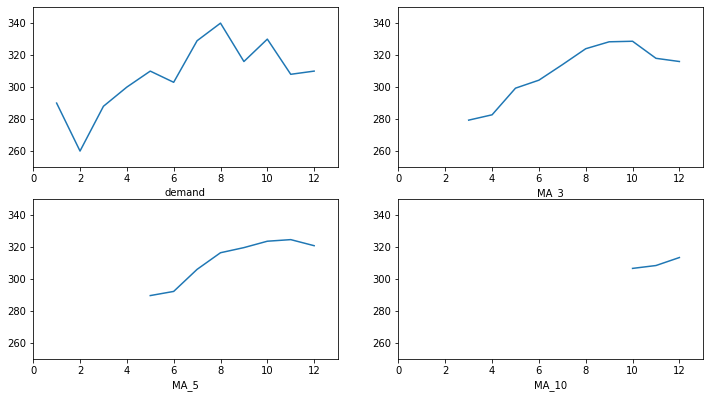

In [133]:
plt.figure(figsize = (12, 10))
for i in range(1, len(paces)+2):
    plt.subplot(3,2,i)
    plt.errorbar(data = df, x = 'month', y = df.columns[i])
    plt.xlabel(df.columns[i])
    plt.xlim(0, df.month.max()+1)
    plt.ylim(df.demand.min() - 10, df.demand.max() + 10);

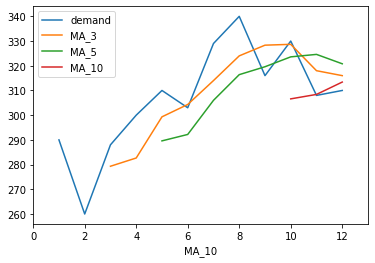

In [134]:
for i in range(1, len(paces)+2):
    plt.errorbar(data = df, x = 'month', y = df.columns[i])
    plt.xlabel(df.columns[i])
    plt.xlim(0, df.month.max()+1)
plt.legend(loc = 0);

In [ ]:
# descriptive statistics for numeric variables
print(df_images.describe())
## Check if there is any duplicate
print("Duplicate:",sum(df_images.duplicated()))

## Which features have missing values - confirmed the df.info() method
print("Number of missing values for each column:")
df_images.isnull().sum()
## Counting the unique values for each column
for column in df_images.columns:
    print(column, df_images[column].nunique())

In [ ]:

The data consists of the information of all purchases of an online retail company in the UK
during an eight month period. The dataset can be found in the Kaggle site 
(https://www.kaggle.com/vijayuv/onlineretail?select=OnlineRetail.csv).